In [54]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import os
import numpy as np
from pandas.compat import StringIO
from pandas.io.common import urlopen
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from datetime import datetime
import pandas as pd
import seaborn as sns
from pymongo import MongoClient
from datetime import datetime
from arctic import Arctic
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
store = Arctic('localhost')
store.initialize_library('FUTURES')
library = store['FUTURES']

In [56]:
map=pd.read_csv('markets.csv',index_col='Market').to_dict()['Sector']

In [57]:
df = pd.DataFrame()
for mkt in library.list_symbols():
    if map[mkt]=='Commodities':
        try:
            df[mkt]=library.read(mkt).data.Price.replace(to_replace=0, method='ffill')
        except:
            print mkt 

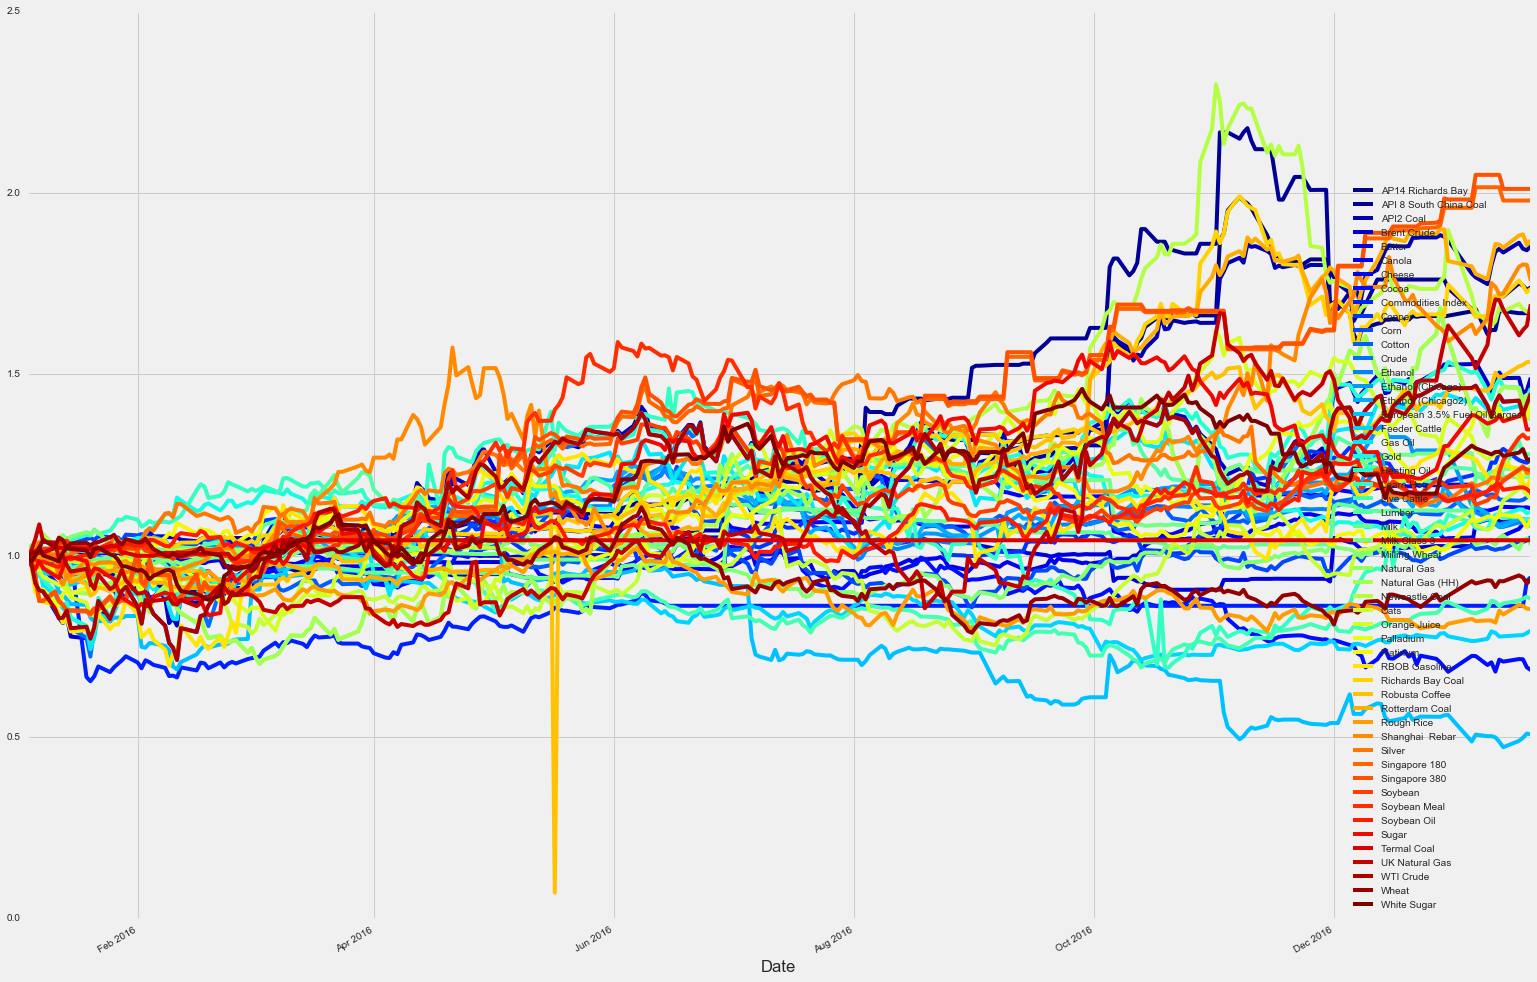

In [58]:
data=df.ffill()['2016':]/df.ffill()['2016':].ix[0]
data.plot(colormap='jet')

In [59]:

data=pd.DataFrame()
for mkt in library.list_symbols():
    try:
        data[mkt]=library.read(mkt).data.Price
    except:
        print mkt
zscores=(data-pd.ewma(data,20))/pd.ewmstd(data,20)
latest=zscores.tail(2)
zscore_ranked=latest.T.sort_values(by=latest.T.columns[0]).dropna()[:5]
zscore_ranked=zscore_ranked.append(latest.T.sort_values(by=latest.T.columns[0]).dropna()[-5:])



Hang Seng


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)


In [60]:
data=pd.DataFrame()
i=1
for d in zscore_ranked.columns:
    data['T+'+str(i)]=zscore_ranked[d]
    i=i+1

In [61]:
data

,T+1,T+2
Orange Juice,-1.701382,-1.626828
Eurodollar,-1.329462,-1.244837
Ethanol (Chicago2),-1.239726,-0.975027
Ethanol (Chicago),-1.159980,-1.060847
Ethanol,-1.142069,-0.988320
Corn,1.444980,1.656240
Robusta Coffee,1.469417,1.391619
Soybean,1.676423,1.460656
Oats,1.812203,1.844553
Soybean Meal,2.041598,1.842183


In [63]:
data = pd.DataFrame()
for m in library.list_symbols():
    try:
        data[m] = library.read(m).data.Price
    except:
        print m

Hang Seng


#Calculating factor zscores
Selecting the factors is the key question.  Probably should make sure everything is in the same direction and not getting diversification 

In [210]:
factors= {
    'Risk on':['Russell 2000','DAX'],
    'Quantitative Easing':['Gold','German Bund','Gilts','US Treasuries 10 Yr'],
    'Emerging Markets':['Copper','MXN','Ibovespa','Taiwan (SIMEX)','FTSE A50 Index'],
    'EU':['DAX','FTSE 100','German Bund','Italian 10 year bonds'],
    'Energies':['Crude','Rotterdam Coal','Natural Gas'],
    'Industrials':['Copper','Rotterdam Coal','Crude','Shanghai  Rebar']
}

In [212]:
df=pd.DataFrame()
for m in factors['EU']:
    try:
        df[m] = library.read(m).data.Price.replace(to_replace=0, method='ffill')
    except:
        print m
df.tail()


,DAX,FTSE 100,German Bund,Italian 10 year bonds
Date,,,,
2017-02-06,11523.5,7108.5,163.19,129.90
2017-02-07,11541.0,7112.5,163.38,130.25
2017-02-08,11541.5,7125.0,164.22,131.13
2017-02-09,11650.5,7171.5,164.23,131.82
2017-02-10,11660.0,7188.5,163.91,130.86


In [213]:
factor_data = pd.DataFrame()
for f in factors.keys():
    df=pd.DataFrame()
    for m in factors[f]:
        try:
            df[m] = library.read(m).data.Price.replace(to_replace=0, method='ffill')
        except:
            print m
    factor_data[f]=df.resample(rule='d',how='last').dropna(how='all').pct_change().mean(axis=1)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


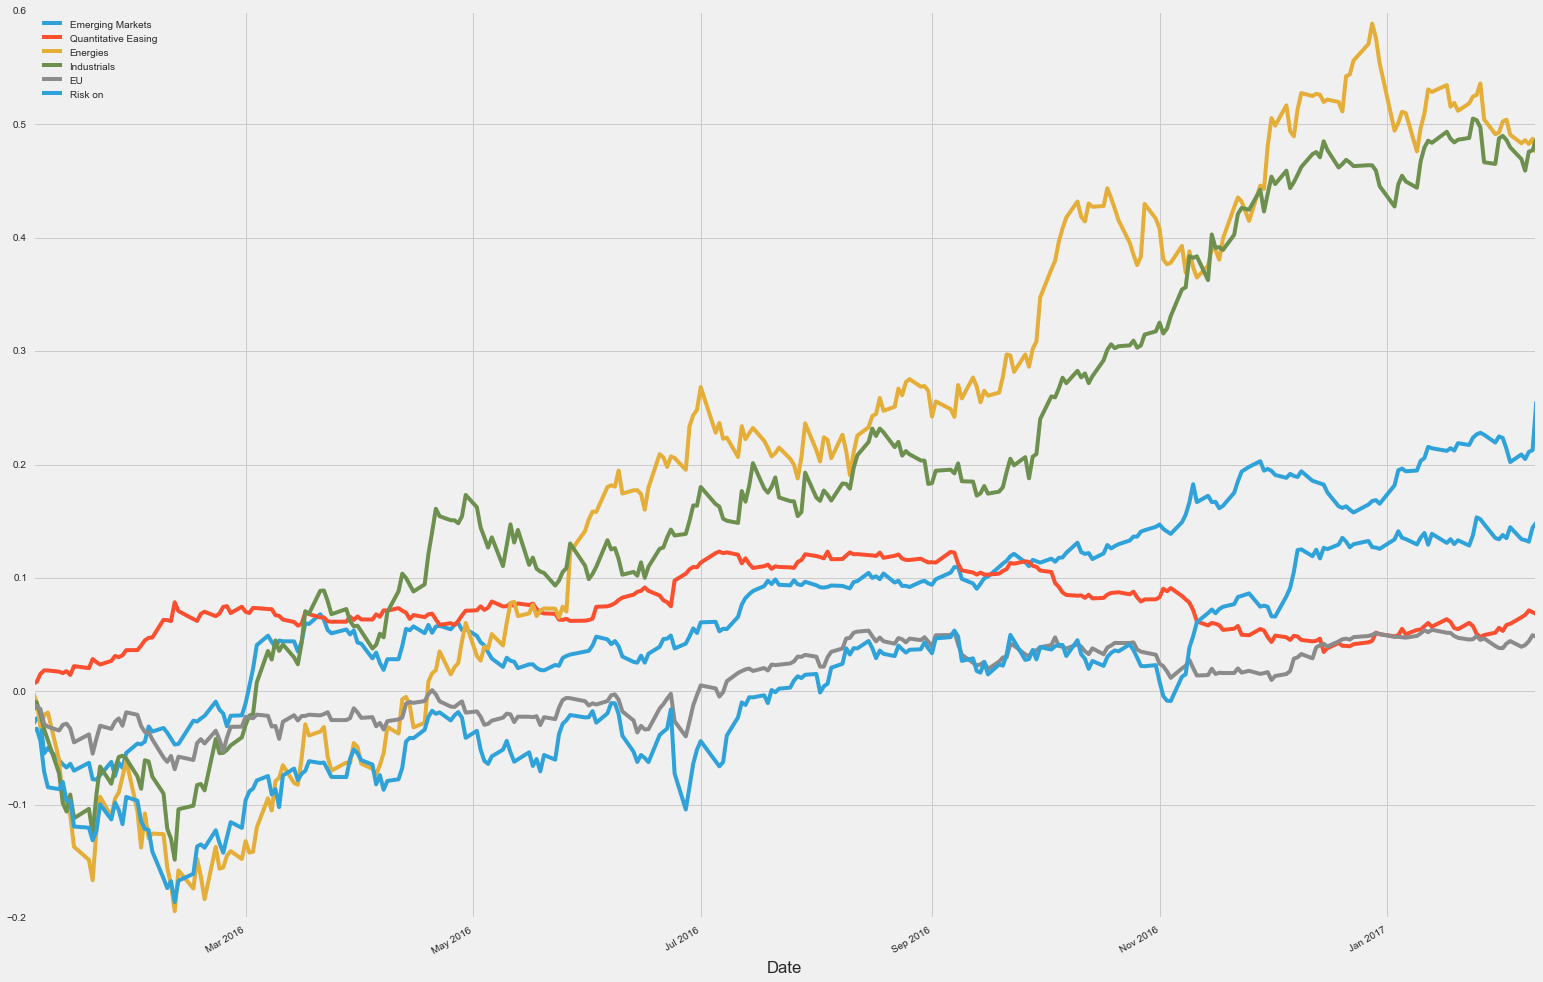

In [214]:
factor_data['2016':].fillna(value=0).cumsum().ffill().plot()

In [215]:
lookback=5
markets=3
zscores=(factor_data.fillna(value=0).cumsum()-pd.ewma(factor_data.cumsum(),60))/pd.ewmstd(factor_data.cumsum(),60)

latest=zscores.tail(lookback)
zscore_ranked=latest.T.sort_values(by=latest.T.columns[0]).dropna()
zscore_ranked=zscore_ranked.append(latest.T.sort_values(by=latest.T.columns[0]).dropna())
final_data=pd.DataFrame()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=60).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=60).std(bias=False)
  app.launch_new_instance()


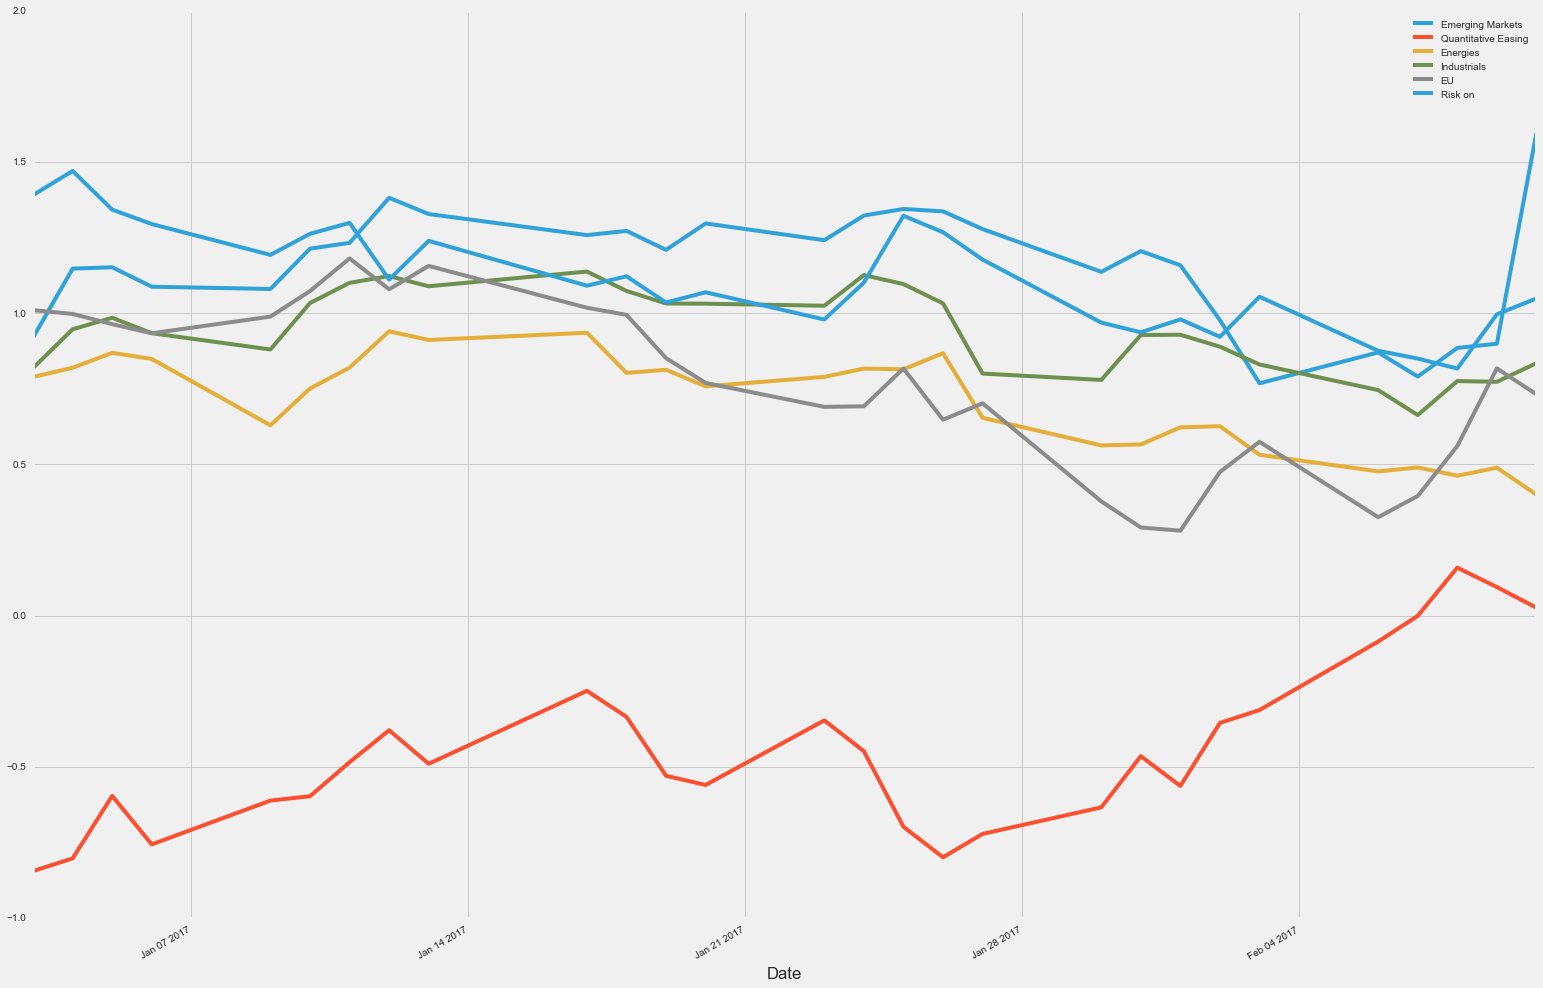

In [218]:
zscores['2017':].plot()

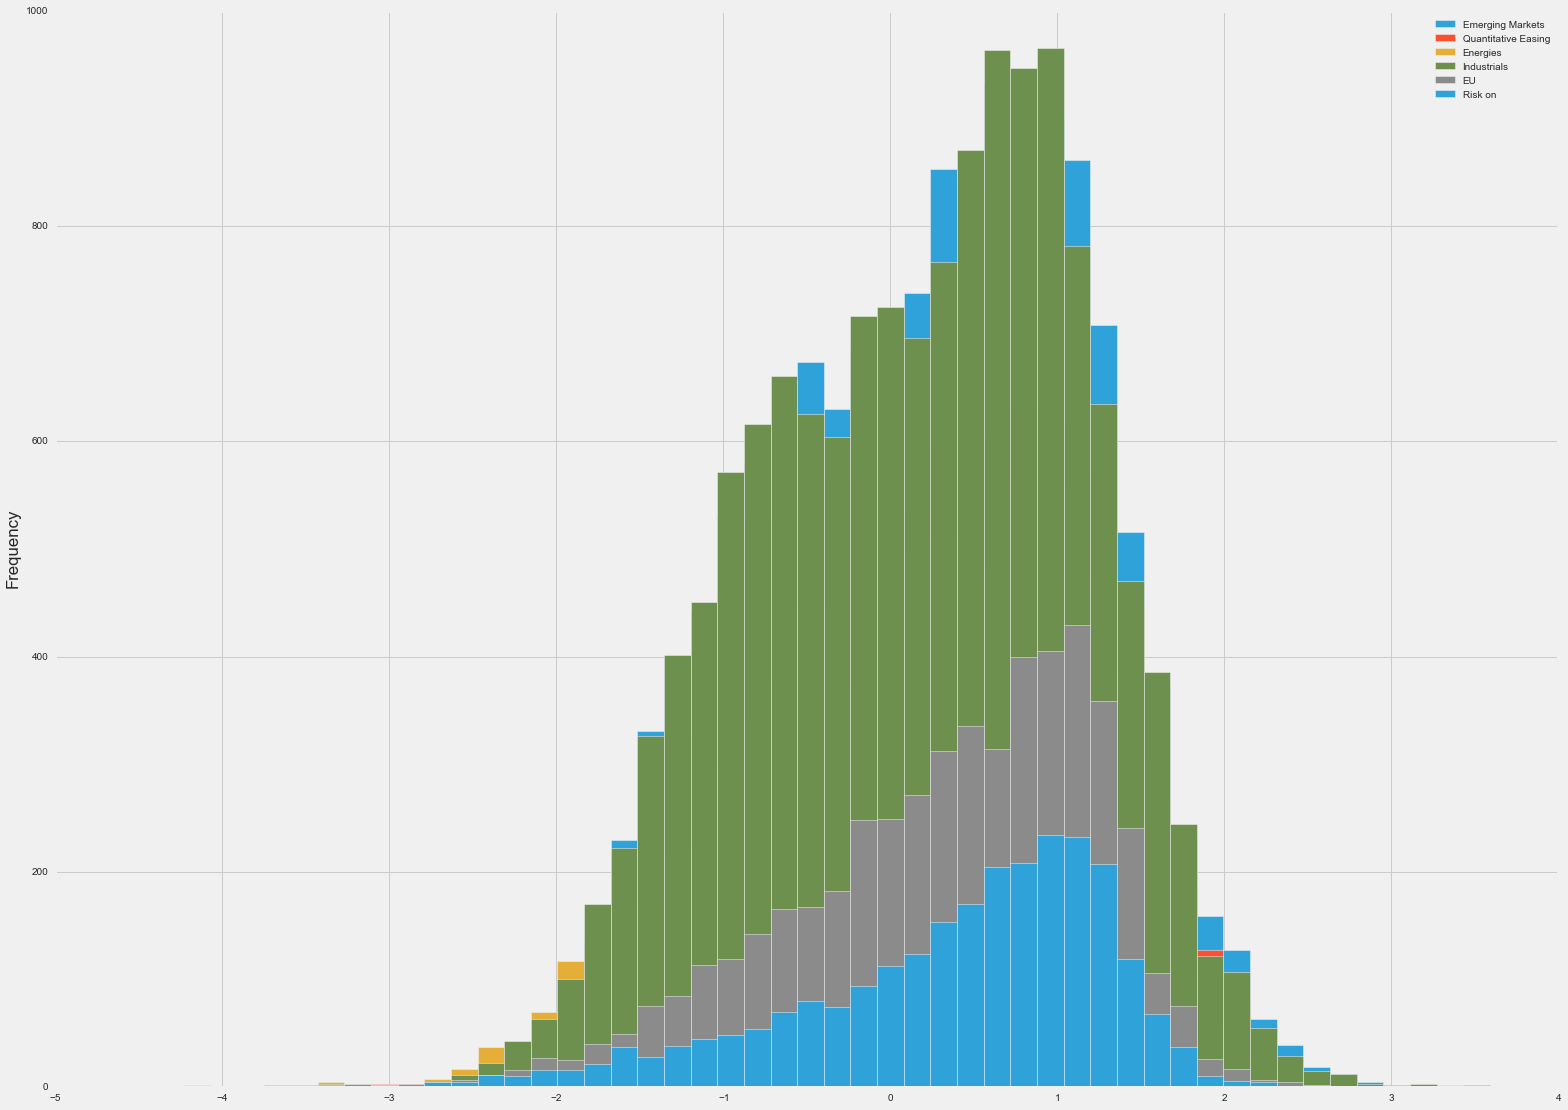

In [219]:
zscores.plot(kind='hist',bins=50)